In [ ]:
Importing required libraries

In [1]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

Reading sample image

In [2]:
im = cv2.imread('/Users/shakeel/Desktop/Coding/Timetable/IMG_0429.jpg')
#Image is initially in the form blue,green,red but we want teh conventional RGB
# b,g,r = cv2.split(im)
# img=cv2.merge((r,g,b))
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
#copy_image is used later when using Hough Line Transform
copy_image = np.copy(im)

In [3]:
config = ('-l eng --oem 1 --psm 3') #we can mess around with the psm

In [4]:
txt = pytesseract.image_to_string(im,config=config)
txt = txt.split('\n')

In [5]:
print(txt)

['eV SCC See eV SEV Ke eee eH EY', '* » ow ice . ge Me', 'as at 02/09/2020', 'AMon ATue AWed AThu Afri BMon Blue BWed Bho Beri', '', 'English Englieh Biology | Geography | Biology English Pnglish fiology | Geography', '', 'ORasS', '', '     ', '  ', '  ', ' ', '  ', ' ', '', '   ', '', '    ', '', '        ', '', '       ', '', '     ', '', '                ', '', '      ', '', '   ', '', '  ', '', ' ', '', '       ', '', '  ', '', '       ', '', '              ', '', ' ', '', ' ', '', '    ', '', '     ', '  ', '', '   ', '    ', ' ', '', '     ', '', '1 CJM J20 | JAS J8 | LIG J6 | MGA M19] LIG W168 | GJM J20 | JAS JH | LIG J6 | MCA Mi9', 'French | Physice | Maths | Geography| Physd | french | Physics | Maths | Geography', '', 'a AGR Gi | CPH J6 | AG GiI5| MGA MI9| ML AGR G1 | CPB J6 | AG Gi6| MCA M19', 'Aoad Manitc Acad Moanite Acad Monite Acad Monite Acad Monite Acad Monite] Acad Manite] Acad Manite) Acad Monite', '', 'AM ERR G4 | ERR G4 | ERR G4 | ERR G4 | ERR G4 | ERR G4 | ERR G4 

Code to help draw boxes around the individual words on the timetable

In [6]:
height_image, width_image,_ = im.shape
boxes = pytesseract.image_to_data(im)
print(boxes)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	2501	1747	-1	
2	1	1	0	0	0	0	0	2473	281	-1	
3	1	1	1	0	0	0	0	2473	281	-1	
4	1	1	1	1	0	0	0	2473	60	-1	
5	1	1	1	1	1	0	0	140	44	65	eV
5	1	1	1	1	2	173	0	108	67	56	SCC
5	1	1	1	1	3	307	0	210	44	38	See
5	1	1	1	1	4	544	0	130	40	38	eV
5	1	1	1	1	5	700	0	205	44	0	SEV
5	1	1	1	1	6	1546	0	35	67	0	Ke
5	1	1	1	1	7	1607	16	253	43	0	eee
5	1	1	1	1	8	1903	15	122	43	0	eH
5	1	1	1	1	9	2339	0	134	60	20	EY
4	1	1	1	2	0	923	62	802	55	-1	
5	1	1	1	2	1	923	77	13	19	0	*
5	1	1	1	2	2	1069	78	11	19	32	»
5	1	1	1	2	3	1098	74	17	33	37	ow
5	1	1	1	2	4	1244	62	67	53	63	ice
5	1	1	1	2	5	1410	68	12	15	50	.
5	1	1	1	2	6	1558	84	33	16	51	ge
5	1	1	1	2	7	1681	72	44	45	71	Me
4	1	1	1	3	0	785	138	410	57	-1	
5	1	1	1	3	1	757	134	90	72	65	as
5	1	1	1	3	2	847	134	60	72	65	at
5	1	1	1	3	3	785	138	410	57	86	02/09/2020
4	1	1	1	4	0	275	213	1988	68	-1	
5	1	1	1	4	1	275	213	167	58	82	AMon
5	1	1	1	4	2	500	216	151	61	82	ATue
5	1	1	1	4	3	692	220	189	60	89	A

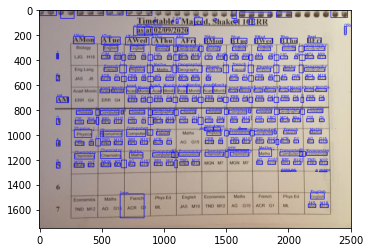

In [7]:
for x,b in enumerate(boxes.splitlines()):
    if x!=0:
        b = b.split()
        #print(b)  Words are at index 11 so only draw boxes if array has length of 12
        if len(b)==12:
            x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
            cv2.rectangle(im,(x,y),(w+x,h+y),(0,0,255),3) #numbers at end define colour red and thickness
            cv2.putText(im,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),2)
            plt.imshow(im)

The code above highlights that the bulit-in OCR from pytesseract is not accurate enough (for the task at hand) and so the code below demonstrates the use of the Hough Line Transform (probabilistic version):

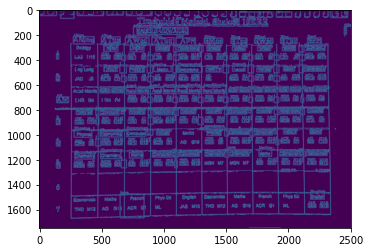

In [9]:
#We need to convert image to a gray scale one for better accuracy.  
#This will be then used in tandem with the built-in Canny Edge Detetction method

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = cv2.Canny(gray,50,150,apertureSize=3)
plt.imshow(im)

In [25]:
#Parameters needed to run the Hough Line Transform function -> im, rho(distance resolution), 
#theta(angle resolution), threshold (lines with enough votes by accumulator will be returned),
#line(will be set to None as other variable will store the data), min_line_length, max_line_gap

rho = 1
theta = np.pi/180
threshold = 50
min_line_length = 10
max_line_gap = 6

lines = cv2.HoughLinesP(im, rho, theta, threshold, None, min_line_length, max_line_gap)
#A variable holding a multi-dimensional array

In [26]:
#Horizontal lines and vertical lines need to be differentiated:

def is_vertical(line):
    #returns a boolean
    return line[0]==line[2]
def is_horizontal(line):
    #returns a boolean 
    return line[1]==line[3]

horizontal_lines = []
vertical_lines = []


if lines is not None:
    for i in range(len(lines)):
        curr = lines[i][0]
        if is_vertical(curr):
            vertical_lines.append(curr)
        elif is_horizontal(curr):
            horizontal_lines.append(curr)
#looping through filled in lists 
for i,line in enumerate(horizontal_lines):
    cv2.line(copy_image,(line[0],line[1]),(line[2],line[3]),(0,255,0),3,cv2.LINE_AA)
    
for i,line in enumerate(vertical_lines):
    cv2.line(copy_image,(line[0],line[1]),(line[2],line[3]),(0,255,0),3,cv2.LINE_AA)
            

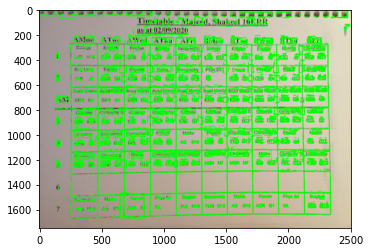

In [27]:
plt.imshow(copy_image)

Defining an Overlap Filter Function to try and get rid of some inaccuracies:

In [28]:
def overlap(lines,sorting_index):
    filtered_lines = []
    lines = sorted(lines, key=lambda lines:lines[sorting_index])
    seperator = 5
    
    for i in range(len(lines)):
        curr_line = lines[i]
        if i>0:
            prev_line = lines[i-1]
            if (curr_line[sorting_index]-prev_line[sorting_index])>seperator:
                filtered_lines.append(curr_line)
        else:
            filtered_lines.append(curr_line)
    return filtered_lines

In [29]:
horizontal_lines = []
vertical_lines = []


if lines is not None:
    for i in range(len(lines)):
        curr = lines[i][0]
        if is_vertical(curr):
            vertical_lines.append(curr)
        elif is_horizontal(curr):
            horizontal_lines.append(curr)
            
    #now with the new function we filter the array of lines
    horizontal_lines = overlap(horizontal_lines,1)
    vertical_lines = overlap(vertical_lines,0)
#looping through filled in lists 
for i,line in enumerate(horizontal_lines):
    cv2.line(copy_image,(line[0],line[1]),(line[2],line[3]),(0,255,0),3,cv2.LINE_AA)
    
for i,line in enumerate(vertical_lines):
    cv2.line(copy_image,(line[0],line[1]),(line[2],line[3]),(0,255,0),3,cv2.LINE_AA)

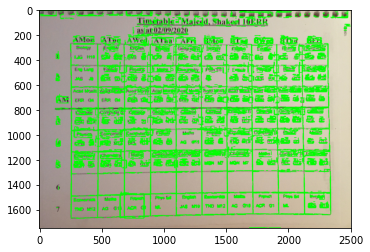

In [30]:
plt.imshow(copy_image)

With the modified image, we can try and extract the text from all of our Regions of Interest using a dictionary